In [1]:
#Importing Google Drive to access Dataset
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
''' Code to check GPU type and RAM on google colab'''


gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)


  from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Mon Aug 17 16:38:14 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
import pandas as pd
import numpy as np
import tarfile
#!pip install opencv-contrib-python
#import cv2
from scipy import misc
import imageio
from PIL import Image
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import train_test_split
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K
from keras.utils.np_utils import to_categorical
import re
import string
from string import digits
import time

In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
os.chdir("/content/drive/My Drive/project/NMTV2/prunedCorpus")
!ls

drive  NMT_data.txt  pruned_train.en  pruned_train.hi


In [6]:
#SOURCE LANGUAGE-------------------------> ENGLISH
#TARGET LANGUAGE-------------------------> HINDI

This is a subsample of IIT-B English - Hindi parallel corpus. I will be using this for pruned dataset for this NMT project because of computational constraints. Can increase the the size for better accuracy.

In [7]:
data = pd.read_csv("NMT_data.txt")
data.drop("Unnamed: 0",axis=1,inplace = True)
data.shape

(315239, 2)

There are some sentences in English with some Hindi words. So this function will remove all those lines.

In [8]:
def clean_string(eng_string):
   try:
    eng_string.encode(encoding = "utf-8").decode("ascii")
   except UnicodeDecodeError:
    return None
   else:
        return eng_string
    
    
data["English"] = data["English"].apply(clean_string) 
data.dropna(inplace = True)
data

,English,Hindi
0,We believe that it is the incredible right of ...,हमारी यह भी मान्यकता है कि यदि सरकार किसी व्ये...
1,Error : Failed to execute xmllint . Please mak...,त्रुटिः xmllint चलाने में असफल . कृपया सुनिश्च...
2,And when We appointed with Moses forty nights ...,और याद करो जब हमने मूसा से चालीस रातों का वादा...
3,So I went back there,तो मैं वापस वहाँ गया
4,So 10 feet per second times time .,तो 10 फीट प्रति सेकंड गुणा समय ।
...,...,...
315234,Cannot create CMS Signer information,CMS हस्ताक्षरकर्ता सूचना नहीं निर्मित कर सकता है
315235,It is axiomatic that the masses can only grow ...,इसलिए यह लाजिमी है कि हम सूबों की भाषाओं पर जो...
315236,Basava was . a young boy of sixteen then and t...,बसव तब षोडशवर्षीय किशोर था और उसके बांधवों में...
315237,He concluded his thesis with the following wor...,अपना प्रबन्ध उनहोंने निम्नांकित शब्दों में समा...


Setting maximum sentence line as 25

In [9]:
def string_len(s):
    count = len(s.split())
    if count > 25:
        return None
    else:
        return s

All preprocessing steps will be done here. 

*   Convert to lower case

*   Convert special characters
*   Remove Digits


*  Remove spaces

*  Add start and end tags to each sentence






In [10]:
#PRE PROCESSING-------->Remove all punctuations, convert to lowersletters, remove numbers

def preprocess_sentence(sentence):
    
    if string_len(sentence) == None:
        return None
    num_digits= str.maketrans('','', digits)
    
    sentence= sentence.lower()
    sentence= re.sub(" +", " ", sentence)
    sentence = re.sub("[#$%&\()*+-/:;<=>@[\\]^_{}~]","",sentence)
    sentence= re.sub("'", '', sentence)
    sentence= sentence.translate(num_digits)
    sentence = re.sub("[२३०८१५७९४६]", "", sentence)
    sentence= re.sub(r"([?.!,¿|])", r" \1 ", sentence)
    sentence = sentence.rstrip().strip()
    sentence=  'start_ ' + sentence + ' _end'
    
    return sentence

In [11]:
data["English"] = data["English"].apply(preprocess_sentence)
data["Hindi"] = data["Hindi"].apply(preprocess_sentence)
data.dropna(inplace = True)
data

,English,Hindi
1,start_ error failed to execute xmllint pleas...,start_ त्रुटिः xmllint चलाने में असफल कृपया स...
3,start_ so i went back there _end,start_ तो मैं वापस वहाँ गया _end
4,start_ so feet per second times time _end,start_ तो फीट प्रति सेकंड गुणा समय । _end
5,start_ delete failed with http status d http ...,start_ स्थिति के साथ मिटाना विफल _end
6,start_ pandit had a great ambition to see bal ...,start_ पंडित की उच्चाकांक्षा बाल गंधर्व को रंग...
...,...,...
315232,start_ pulseaudio sound server _end,start_ पल्सऑडियो ध्वनि सर्वर _end
315233,start_ to these are added the problems created...,start_ इनमे वे समस्याएं भी जुड गई है जो बहारी ...
315234,start_ cannot create cms signer information _end,start_ cms हस्ताक्षरकर्ता सूचना नहीं निर्मित क...
315237,start_ he concluded his thesis with the follow...,start_ अपना प्रबन्ध उनहोंने निम्नांकित शब्दों ...


Creating English and Hindi Vocabulary 

In [12]:
### Get English and Hindi Vocabulary
all_eng_words=set()
for eng in data['English']:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)

all_hindi_words=set()
for hin in data['Hindi']:
    for word in hin.split():
        if word not in all_hindi_words:
            all_hindi_words.add(word)

            
len(all_eng_words),len(all_hindi_words)            

(61823, 90604)

In [13]:
#For Displaying Results
eng_lang = data["English"]
hin_lang = data["Hindi"]

Using tf.keras.preprocessing for tokenizing words in sentences, getting word index and padding sentences

In [14]:
################################# TOKENIZATION #####################################################

def tokenize(lang):
  # create a tokenizer for source sentence  
  lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
  

  # Fit the source sentences to the source tokenizer
  lang_tokenizer.fit_on_texts(lang)


  # Get our training data word index
  #Giving integer values to all words
  word_index = lang_tokenizer.word_index
  #len(word_index)


  #Transforms each text in texts to a sequence of integers.
  tensor = lang_tokenizer.texts_to_sequences(lang)



  #Sequences that are shorter than num_timesteps, padded with 0 at the end.
  # This function transforms a list of `num_samples` sequences (lists of integers) into a 2D Numpy array of shape `(num_samples, num_timesteps)`.
  # `num_timesteps` is either the `maxlen` argument if provided, or the length of the longest sequence otherwise.
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,padding='post')

  return tensor, lang_tokenizer

#lang_tokenizer is required to create a object of tf.tokenizer to be used to get word_index
input_tensor,inp_lang = tokenize(data["English"])
target_tensor, targ_lang= tokenize(data["Hindi"])


In [15]:
max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

Train Test Split

In [16]:
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

    
print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))

167603 167603 41901 41901


In [17]:
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.index_word[t]))

Sample Sentence

In [18]:
print ("Input Language; index to word mapping")
convert(inp_lang, input_tensor_train[1])
print ()
print ("Target Language; index to word mapping")
convert(targ_lang, target_tensor_train[1])

Input Language; index to word mapping
1 ----> start_
57 ----> if
17 ----> you
105 ----> work
10 ----> for
33 ----> an
4259 ----> employer
17 ----> you
27 ----> have
383 ----> special
779 ----> rights
94 ----> such
22 ----> as
1504 ----> weeks
6813 ----> maternity
472 ----> leave
2 ----> _end

Target Language; index to word mapping
1 ----> start_
167 ----> अगर
54 ----> आप
9135 ----> कोऋ
22443 ----> एम्प्लोयेर्
4 ----> के
13 ----> लिए
37248 ----> नऋकरी
27 ----> कर
67 ----> रहे
5 ----> है
23 ----> तो
54 ----> आप
11 ----> को
893 ----> सप्ताह
65 ----> तक
3370 ----> गर्भावस्था
7 ----> की
2184 ----> छुट्टी
411 ----> लेने
10 ----> का
345 ----> अधिकार
5 ----> है
2 ----> _end


Creating a batch of 64 with embeding size as 256 and encoder/decoder units as 1024. Can play around with these to improve the model

In [19]:
############################# CREATING BATCH USING DATASET OBJECT OF TF #######################################

BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1




dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train))
dataset = dataset.batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((input_tensor_val, target_tensor_val))
val_dataset = val_dataset.batch(64)


source_batch, target_batch = next(iter(dataset))
print(source_batch.shape)
print(target_batch.shape)
#dimensions-------> batchsize, max lenght of a sting in source and target 

(64, 27)
(64, 33)


In [20]:
vocab_inp_size,vocab_tar_size

(61824, 90605)

In [21]:
####################### ENCODER ######################################################

class Encoder(tf.keras.Model):
    
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_size):
        super(Encoder, self).__init__()
        self.batch_size = batch_size
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)#input--->vocab_size;output--->embedding_dim
        self.gru = tf.keras.layers.GRU(self.enc_units,
                                        return_sequences = True,#to return the the full sequence----->hidden state
                                        return_state = True,
                                        recurrent_initializer="glorot_uniform")#Xavier uniform initializer.Draws samples from a uniform distribution
        
    #call is forward pass. for gru its parameters are inputs which is x and initial_state which is hidden. dim of x is batch,timesteps,feature
    def call(self, x, hidden):
        x = self.embedding(x)
        output,state = self.gru(x, initial_state = hidden)
        return output, state
    
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_size,self.enc_units))


In [22]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

Attention class

In [23]:
####################### ATTENTION #####################################

class Attention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(Attention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)
    
  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)-------------> sta
    # values shape == (batch_size, max_len, hidden size)-------------->hj
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    #this is ejt:how imp is the jth input word at tth timestep
    score = self.V(tf.nn.tanh(self.W1(query_with_time_axis) + self.W2(values)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights  

In [24]:
attention_layer = Attention(10)

In [25]:
################### DECODER ####################################

class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, decoder_units, batch_size):
        super (Decoder,self).__init__()
        self.batch_size= batch_size
        self.decoder_units = decoder_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru= tf.keras.layers.GRU(decoder_units, 
                                      return_sequences= True,
                                      return_state=True,
                                      recurrent_initializer='glorot_uniform')
        # Fully connected layer
        self.fc= tf.keras.layers.Dense(vocab_size)
        
        # attention
        self.attention = Attention(self.decoder_units)
        
    
    def call(self, x, hidden, enc_output):
        
        # enc_output shape == (batch_size, max_length, hidden_size)
        context_vector, attention_weights = self.attention(hidden, enc_output)

        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)

        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        # passing the concatenated vector to the GRU
        output, state = self.gru(x)

        # output shape == (batch_size * 1, hidden_size)
        output = tf.reshape(output, (-1, output.shape[2]))

        # output shape == (batch_size, vocab)
        x = self.fc(output)

        return x, state, attention_weights 

In [26]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

In [27]:
######################## OPTIMIZER ############################################

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)
  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)  

Creating Checkpoint Directory

In [28]:
checkpoint_dir = '/content/drive/My Drive/project/NMTV2/check_model'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder,
                                layer = attention_layer)

In [29]:
!ls "/content/drive/My Drive/project/NMTV2/check_model"

checkpoint  ckpt-8.data-00000-of-00001	ckpt-8.index


In [30]:
################ TRAINING ##############################
def train_step(inp, targ, enc_hidden):
    loss = 0
    with tf.GradientTape() as tape:
        #create encoder
        enc_output, enc_hidden = encoder(inp, enc_hidden)
        dec_hidden = enc_hidden
        
        #first input to decode is start_
        dec_input = tf.expand_dims([targ_lang.word_index['start_']] * BATCH_SIZE, 1)
        
        # Teacher forcing - feeding the target as the next input
        for t in range(1, targ.shape[1]):
          # passing enc_output to the decoder
          predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
          
          # calculate loss based on predictions  
          loss += loss_function(targ[:, t], predictions)
          
          # using teacher forcing
          dec_input = tf.expand_dims(targ[:, t], 1)
    
    batch_loss = (loss / int(targ.shape[1]))
    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    return batch_loss

To Restore from last Checkpoint

In [31]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
EPOCHS=6
for epoch in range(EPOCHS):
    start = time.time()
    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0

    # train the model using data in bataches 
    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, targ, enc_hidden)
        total_loss += batch_loss
        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {}'.format(epoch + 1,batch,batch_loss.numpy()))
            print('Epoch {} Loss {}'.format(epoch + 1,total_loss / steps_per_epoch))
            print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    if (epoch + 1) % 2 == 0:       
        checkpoint.save(file_prefix = checkpoint_prefix)
        print('Epoch {} Loss {:.4f}'.format(epoch + 1,total_loss / steps_per_epoch))
        print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.6166244745254517
Epoch 1 Loss 0.00023553264327347279
Time taken for 1 epoch 33.75298237800598 sec

Epoch 1 Batch 100 Loss 0.5831127166748047
Epoch 1 Loss 0.026151787489652634
Time taken for 1 epoch 151.88488864898682 sec

Epoch 1 Batch 200 Loss 0.6885926127433777
Epoch 1 Loss 0.05176496505737305
Time taken for 1 epoch 269.3380010128021 sec

Epoch 1 Batch 300 Loss 0.7564595937728882
Epoch 1 Loss 0.0778631865978241
Time taken for 1 epoch 387.36487555503845 sec

Epoch 1 Batch 400 Loss 0.840550422668457
Epoch 1 Loss 0.10383568704128265
Time taken for 1 epoch 504.7723157405853 sec

Epoch 1 Batch 500 Loss 0.715522050857544
Epoch 1 Loss 0.13019482791423798
Time taken for 1 epoch 622.25279545784 sec

Epoch 1 Batch 600 Loss 0.46014752984046936
Epoch 1 Loss 0.15649156272411346
Time taken for 1 epoch 739.3491003513336 sec

Epoch 1 Batch 700 Loss 0.8074981570243835
Epoch 1 Loss 0.1832168996334076
Time taken for 1 epoch 856.4551222324371 sec

Epoch 1 Batch 800 Loss 0.64046829

In [32]:
 def evaluate(sentence):
  attention_plot = np.zeros((max_length_targ, max_length_inp))

  sentence = preprocess_sentence(sentence)
  
  inputs = [inp_lang.word_index[i] for i in sentence.split()]
  
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([targ_lang.word_index['start_']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    # storing the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '_end':
      return result, sentence, attention_plot

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot

In [35]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
  hindi_font = FontProperties(fname = '/content/drive/My Drive/project/NMTV2/Nirmala.ttf')
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 20}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict,fontproperties = hindi_font)
  # print(sentence)
  # print(predicted_sentence)
  #plt.yticks(list(range(len(predicted_sentence))), predicted_sentence, fontproperties = hindi_font)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  #plt.show()

In [36]:
def translate(sentence):
  result, sentence, attention_plot = evaluate(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [37]:
# restoring the latest checkpoint in checkpoint_dir
#checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

Some test examples

Input: start_ so i went back there _end
Predicted translation: तो मैं वापस वहीं पर पहुँच गया _end 


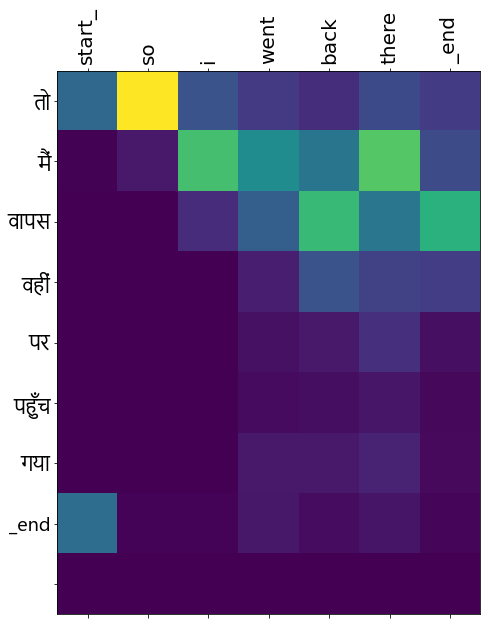

In [38]:
translate('So I went back there')

Input: start_ i am going to work _end
Predicted translation: मैं खेलने जा रही हूँ _end 


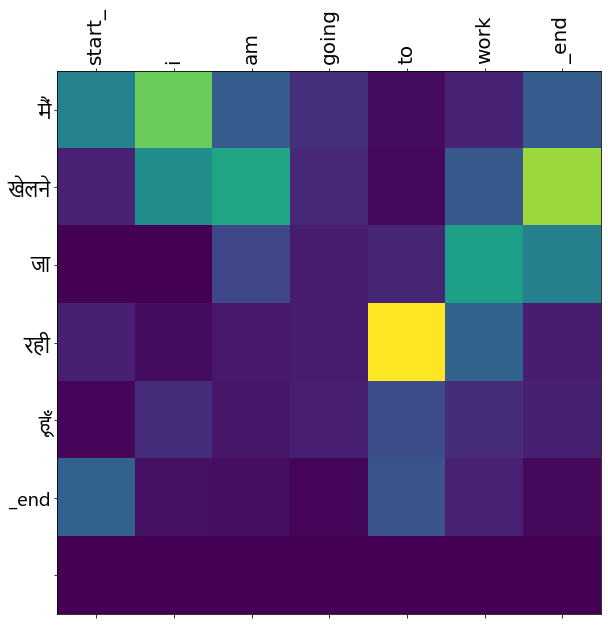

In [39]:
translate('I am going to work.')

Input: start_ i am going to play _end
Predicted translation: मैं खेलने जा रहा हूँ । _end 


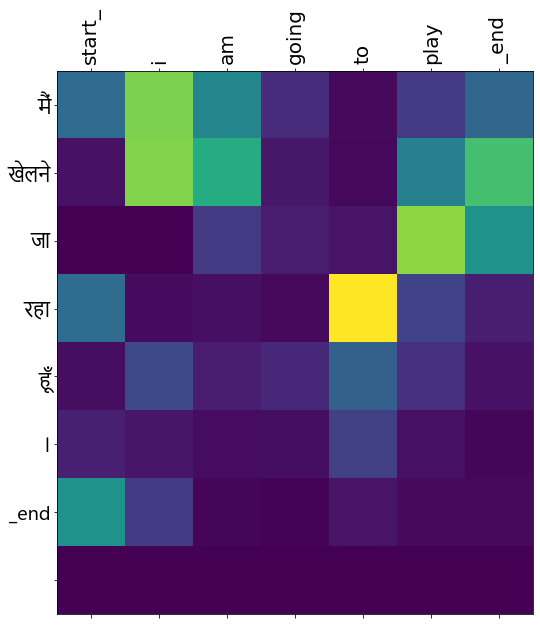

In [41]:
translate('I am going to play.')

Input: start_ this is a good project _end
Predicted translation: यह अच्छी परियोजना है । _end 


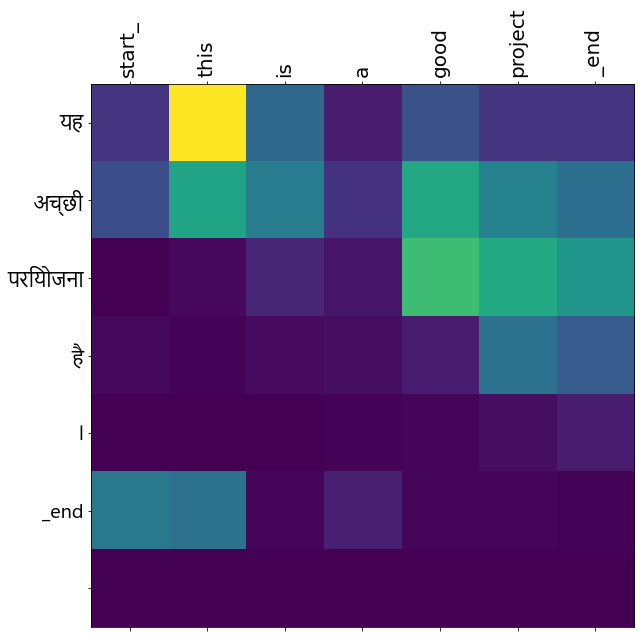

In [42]:
translate('This is a good project')